# 딥러닝 기초: 다층 퍼셉트론(MLP)으로 XOR 문제 해결하기

## 네트워크 구조

### 순전파

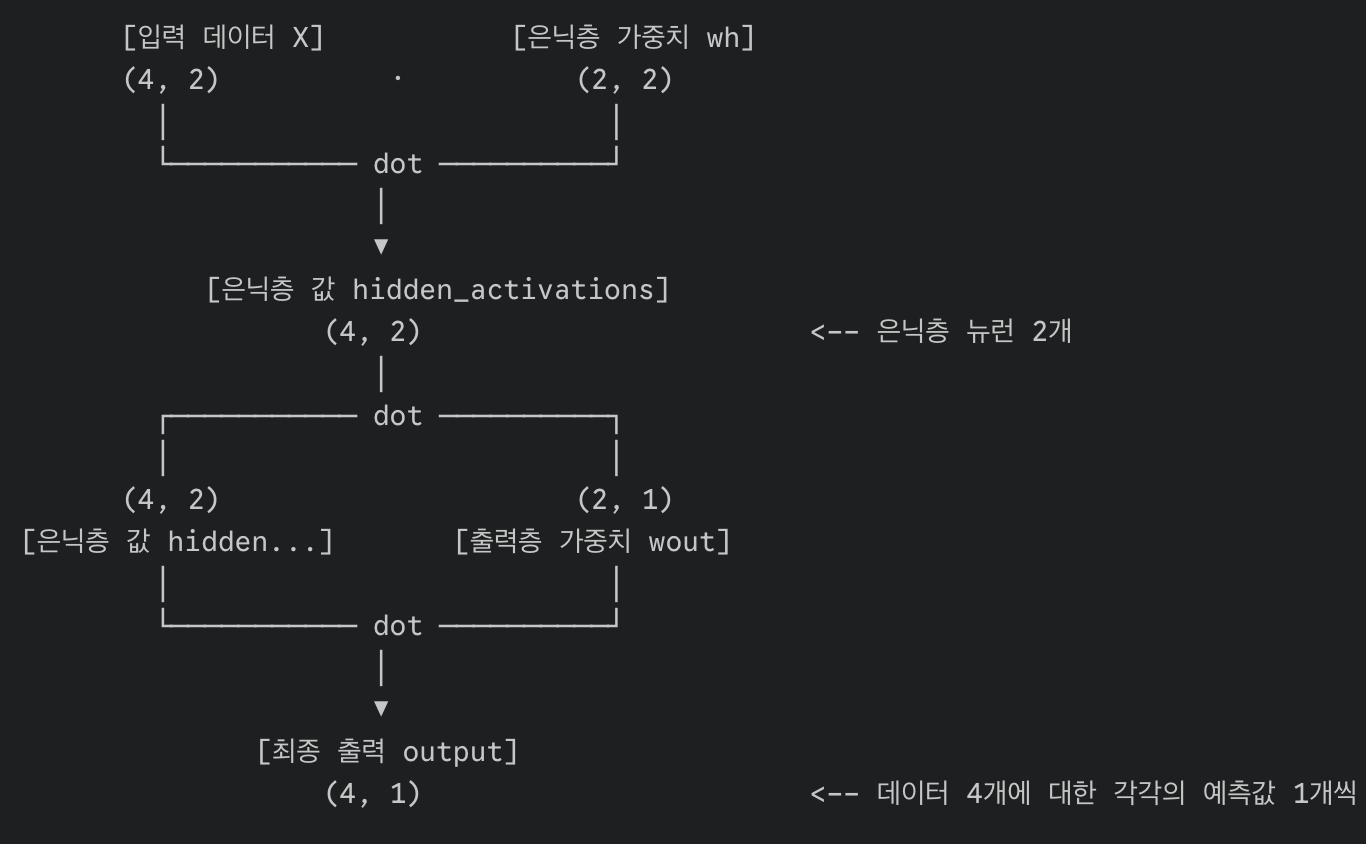

### 역전파

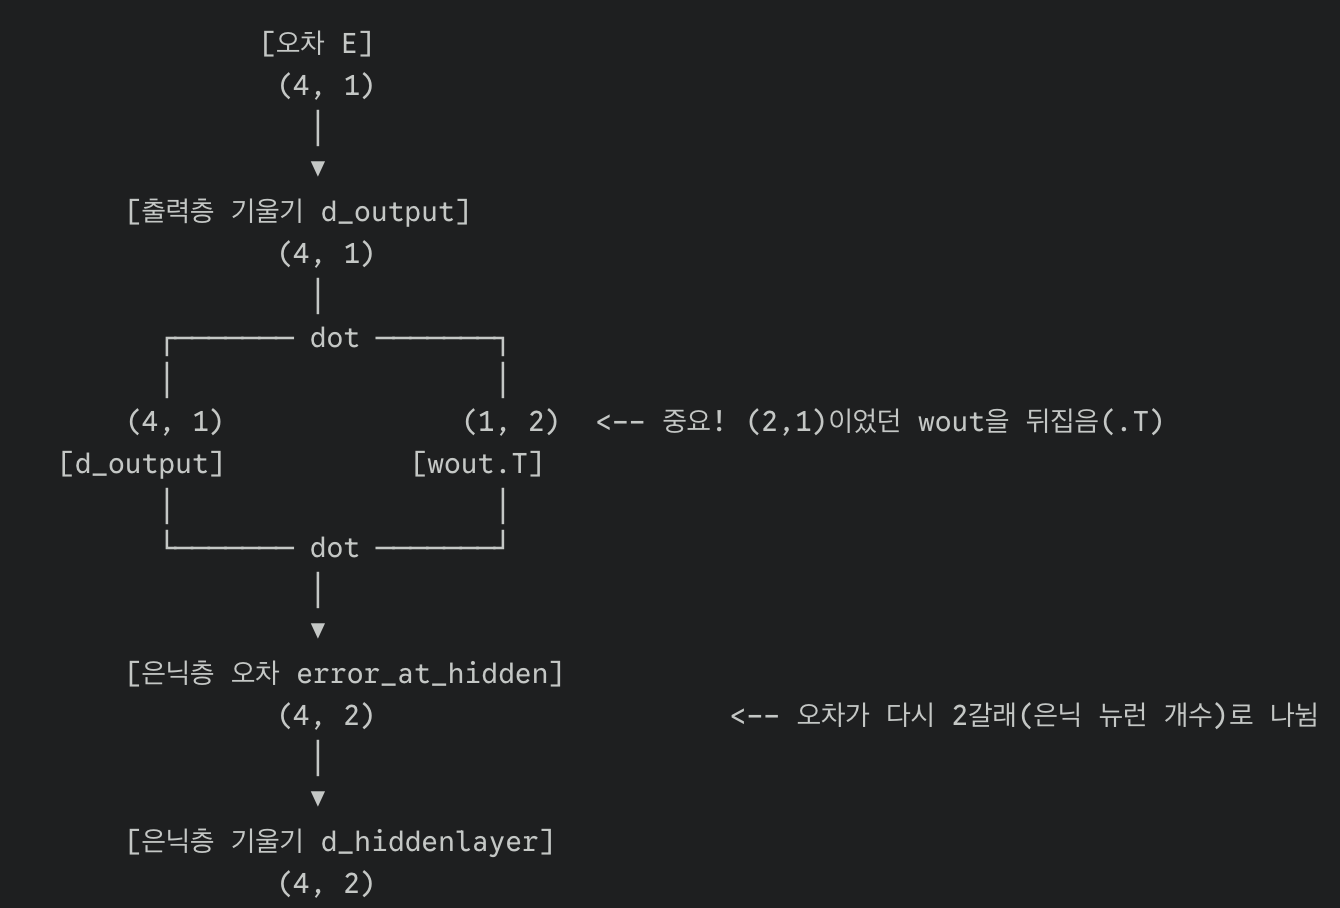

## Numpy 기반 코드

In [ ]:
# @title 딥러닝 기초: 다층 퍼셉트론(MLP)으로 XOR 문제 해결하기
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터셋 준비 (XOR 문제)
# 입력 데이터: (0,0), (0,1), (1,0), (1,1)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# 정답 레이블: 같으면 0, 다르면 1
y = np.array([[0],
              [1],
              [1],
              [0]])

# 2. 활성화 함수 및 미분 함수 정의 (시그모이드)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 시그모이드 함수의 미분: f'(x) = f(x) * (1 - f(x)) 
# 역전파 시 기울기 계산에 사용됩니다.
def sigmoid_derivative(x):
    return x * (1 - x)

# 3. 신경망 구조 설정 및 가중치 초기화
# 입력층 노드: 2개, 은닉층 노드: 2개, 출력층 노드: 1개
input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1

# 가중치(Weight)와 편향(Bias) 랜덤 초기화
# 은닉층 가중치 및 편향
np.random.seed(42) # 재현성을 위해 시드 고정
wh = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
bh = np.random.uniform(size=(1, hidden_layer_neurons))

# 출력층 가중치 및 편향
wout = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bout = np.random.uniform(size=(1, output_neurons))

# 학습 파라미터 설정
epochs = 10000  # 학습 횟수
learning_rate = 0.1 # 학습률 (alpha)

# 손실값 기록용 리스트
losses = []


학습 시작...
Epoch 0 Loss: 0.3247
Epoch 1000 Loss: 0.2406
Epoch 2000 Loss: 0.1960
Epoch 3000 Loss: 0.1207
Epoch 4000 Loss: 0.0305
Epoch 5000 Loss: 0.0125
Epoch 6000 Loss: 0.0074
Epoch 7000 Loss: 0.0051
Epoch 8000 Loss: 0.0038
Epoch 9000 Loss: 0.0031
학습 종료!

[학습 결과 확인]
입력값(XOR):
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
예측값:
 [[0.05322146]
 [0.95171535]
 [0.95160449]
 [0.05175396]]
정답:
 [[0]
 [1]
 [1]
 [0]]


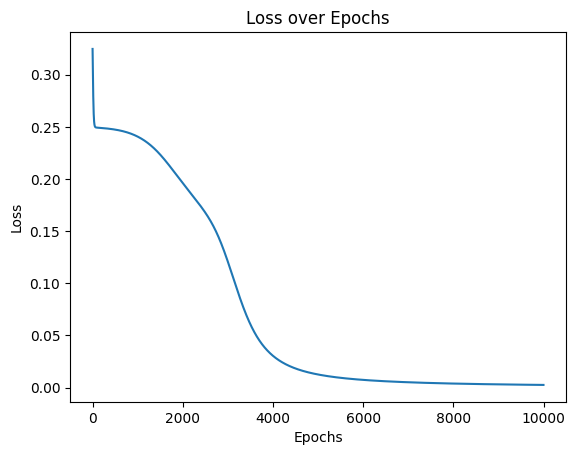

In [ ]:
#@title 학습 시작
# 4. 학습 시작 (Epoch만큼 반복)
print("학습 시작...")
for i in range(epochs):

    # --- [Step 1] 순전파 (Forward Propagation) ---
    # 은닉층 계산: 입력 -> 은닉층
    hidden_layer_input1 = np.dot(X, wh)
    hidden_layer_input = hidden_layer_input1 + bh
    hidden_layer_activations = sigmoid(hidden_layer_input)

    # 출력층 계산: 은닉층 -> 출력층
    output_layer_input1 = np.dot(hidden_layer_activations, wout)
    output_layer_input = output_layer_input1 + bout
    output = sigmoid(output_layer_input)

    # --- [Step 2] 손실(Loss) 계산 ---
    # 여기서는 간단히 MSE(Mean Squared Error)를 사용합니다.
    E = y - output # 오차
    loss = np.mean(np.square(E))
    losses.append(loss)

    # --- [Step 3] 역전파 (Backpropagation) ---
    # 출력층에서의 기울기 계산 (Chain Rule 적용)
    # d_output: 오차 * 활성화함수의 미분값
    d_output = E * sigmoid_derivative(output)

    # 은닉층에서의 기울기 계산
    # 오차를 역전파: 출력층의 기울기를 가중치를 통해 은닉층으로 전달 
    error_at_hidden_layer = d_output.dot(wout.T)
    d_hiddenlayer = error_at_hidden_layer * sigmoid_derivative(hidden_layer_activations)

    # --- [Step 4] 가중치 업데이트 (Gradient Descent) ---
    # 가중치 갱신: 기존 가중치 + (입력값 * 기울기 * 학습률)
    wout += hidden_layer_activations.T.dot(d_output) * learning_rate
    bout += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    wh += X.T.dot(d_hiddenlayer) * learning_rate
    bh += np.sum(d_hiddenlayer, axis=0, keepdims=True) * learning_rate

    if i % 1000 == 0:
        print(f"Epoch {i} Loss: {loss:.4f}")

print("학습 종료!")
print("\n[학습 결과 확인]")
print("입력값(XOR):\n", X)
print("예측값:\n", output)
print("정답:\n", y)

# 5. 손실 감소 그래프 시각화
plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## PyTorch 기반 코드

In [29]:
# @title [심화 1] PyTorch 프레임워크로 XOR 문제 해결 (자동 미분 실습)
import torch
import torch.nn as nn
import torch.optim as optim

# 1. 데이터 준비 (Tensor로 변환)
# PyTorch는 numpy array 대신 Tensor를 사용합니다. [cite: 810-811]
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
y = torch.FloatTensor([[0], [1], [1], [0]])

# 2. 신경망 모델 정의 (nn.Module 상속)
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        # 입력층(2) -> 은닉층(2) -> 활성화(Sigmoid) -> 출력층(1) -> 활성화(Sigmoid)
        self.layer1 = nn.Linear(2, 2) # 가중치(w)와 편향(b)이 내장됨
        self.layer2 = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # 순전파 과정 정의
        x = self.sigmoid(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

model = XORModel()

# 3. 손실함수 및 최적화 기법 설정
criterion = nn.MSELoss()
# 문서에 언급된 최적화 알고리즘 중 하나인 Adam 사용
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. 학습 (Training)
print("PyTorch 학습 시작...")
for epoch in range(3000):
    # 기울기 초기화 (이전 루프의 기울기 삭제)
    optimizer.zero_grad()

    # 순전파 (Forward)
    hypothesis = model(X)

    # 손실 계산 (Cost)
    cost = criterion(hypothesis, y)

    # 역전파 (Backward) - Numpy에서 수십 줄이었던 미분 코드가 이 한 줄로 끝납니다.
    cost.backward()

    # 가중치 업데이트 (Optimizer)
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch} Cost: {cost.item():.4f}')

# 5. 결과 확인
with torch.no_grad(): # 평가할 때는 기울기 계산 불필요
    predicted = (model(X) > 0.5).float()
    accuracy = (predicted == y).float().mean()
    print('\n모델 예측값:\n', model(X).detach().numpy())
    print('정확도:', accuracy.item())

PyTorch 학습 시작...
Epoch 0 Cost: 0.2979
Epoch 1000 Cost: 0.0117
Epoch 2000 Cost: 0.0015

모델 예측값:
 [[0.02365599]
 [0.9780286 ]
 [0.9779489 ]
 [0.0266752 ]]
정확도: 1.0
